In [62]:
import pandas as pd

In [63]:
data = pd.read_csv('insurance.csv')

In [64]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [66]:
data.shape

(1338, 7)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Null Values

In [68]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Get Overall Statistics

In [69]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Convert Columns To Numerical Values

In [70]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [71]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [72]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [73]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [74]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3, 'northeast':4})

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Store Feature Matrix In X and Response In Vector y

In [76]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
X = data.drop(['charges'],axis=1)

In [78]:
y = data['charges']

# Train/Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=30)

In [81]:
y_train

1050     8023.13545
436      2254.79670
670      4837.58230
573     31620.00106
977      2902.90650
           ...     
919      5245.22690
1164     7153.55390
500     36197.69900
941      9549.56510
421     46599.10840
Name: charges, Length: 1070, dtype: float64

# Model Training

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [85]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [101]:
df1

,Actual,Lr,svm,rf,gr
338,41919.09700,35760.483524,9294.412318,41519.540852,42941.025554
620,3659.34600,5381.158775,9158.020684,4191.098866,4440.376156
965,4746.34400,5326.217663,9187.226664,6157.691883,7365.836445
128,32734.18630,26714.851021,9171.074747,16568.533813,15720.053184
329,9144.56500,12536.551730,9307.693272,11980.419148,12699.984978
...,...,...,...,...,...
580,12913.99240,12322.224293,9341.047123,14943.548494,14418.345146
786,12741.16745,15876.416590,9349.700148,17637.321172,15186.582207
321,24671.66334,6543.969878,9137.903734,11684.733739,14257.581233
903,8125.78450,12159.193933,9288.624698,10086.030719,10432.537993


In [87]:
import matplotlib.pyplot as plt

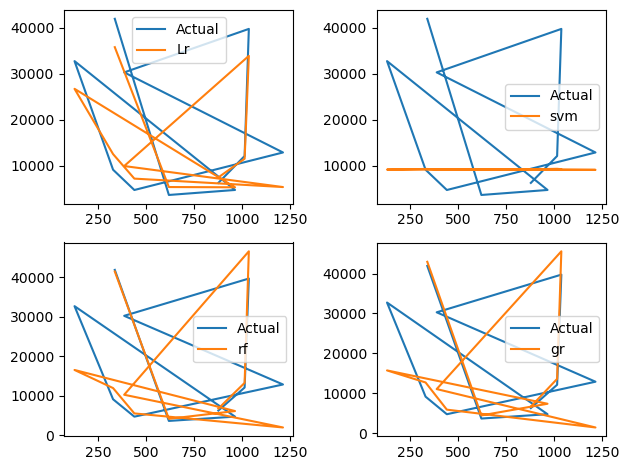

In [100]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

plt.tight_layout()


# Evaluate Models

In [102]:
from sklearn import metrics 

In [103]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [104]:
print(score1, score2, score3, score4)

0.7602344599010098 -0.13862236590670385 0.8193882182366594 0.8468608299828366


model 4 (GradientBoostingRegressor) is performing the best

In [105]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [106]:
print(s1,s2,s3,s4)

4178.116485416855 8451.986943448102 2914.4656914473126 2684.238264204292


again model 4 is performing the best due to the lowest error

# Predict Charges for New Customers

In [108]:
data = {'age':40,
        'sex':1,
        'bmi':40.3,
        'children':4,
        'smoker':1,
       'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [109]:
new_pred = gr.predict(df)
print(new_pred)

[41639.58561364]


# Save Model Using Joblib

In [110]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [111]:
import joblib

In [112]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [114]:
model = joblib.load('model_joblib_gr')

In [115]:
model.predict(df)

array([42148.361888])

# GUI

In [116]:
from tkinter import *

In [118]:
import joblib

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = 'Insurance Cost').grid(row=8)
    Label(master, text=result).grid(row=9)

master = Tk()
master.title("Health Insurance Cost Prediction")
label = Label(master,text = "Health Insurance Cost Prediction", bg = 'black', fg = 'white').grid(row=0,columnspan=2)

Label(master,text = 'Enter Your Age').grid(row=1)
Label(master,text = 'Male or Female [1/0]').grid(row=2)
Label(master,text = 'Enter Your BMI Value').grid(row=3)
Label(master,text = 'Enter Number of Children').grid(row=4)
Label(master,text = 'Smoker Yes/No [1/0]').grid(row=5)
Label(master,text = 'Region [1-4]').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,text='Predict',command=show_entry).grid()


mainloop()